# 9 — Directional Edge Analysis 

## Objective
Apply **directional 3×3 high-pass filtering** to three grayscale images (`images/q9/`) and analyze edge content by **direction** (horizontal, vertical, and two diagonals).

## Tasks (what to deliver)
- **9-a:** Apply 3×3 directional high-pass filters (horizontal, vertical, main-diagonal `\`, anti-diagonal `/`) to **each** image and **show** the results.
- **9-b:** Compute the **mean intensity** of **each filtered image**.
- **9-c:** For **each image**, compare the four mean intensities and **interpret** which edge directions dominate.
- **9-d:** **Across images**, compare directional means and discuss how their structural patterns differ (e.g., natural vs. urban vs. textured scenes).



## Filters (3×3 kernels)
Use simple directional high-pass kernels. Example set:

- **Horizontal edges** (responds to horizontal transitions; i.e., vertical derivative):
  ```
  [-1 -1 -1
    0  0  0
    1  1  1]
  ```
- **Vertical edges** (responds to vertical transitions; i.e., horizontal derivative):
  ```
  [-1  0  1
   -1  0  1
   -1  0  1]
  ```
- **Main diagonal (\) edges**:
  ```
  [-1 -1  0
   -1  0  1
    0  1  1]
  ```
- **Anti-diagonal (/) edges**:
  ```
   [ 0  1  1
    -1  0  1
    -1 -1  0]
  ```

> Use absolute response `abs(filter2D)` for visualization/metrics so positive/negative edge polarities contribute equally.



## Procedure (recommended)
1. **Load** each image in grayscale.
2. **Convolve** with each kernel (OpenCV `filter2D`, use a robust border mode like `BORDER_REFLECT_101`).
3. **Magnitude for display/metrics:** take absolute value of the filtered response.
4. **Show** the original + the four directional responses.
5. **Compute means:** `mean(|response|)` for each direction (compute mean on the float magnitude before clipping).
6. **Record** the means in a small table per image.



## Interpretation Guide
- **Higher mean** for a given direction ⇒ **more/stronger edges** aligned with that direction in the image.
- **Horizontal dominance:** scenes with many horizontal structures (e.g., horizons, rooftops, strata).
- **Vertical dominance:** scenes with many vertical features (e.g., building facades, tree trunks).
- **Diagonal dominance:** roads/ridges or textures aligned diagonally; anisotropic patterns.
- **Across images (9-d):**
  - **Urban:** often higher **vertical/horizontal** means (man-made orthogonal geometry).
  - **Natural/terrain:** may show **diagonal** or mixed dominance (irregular structures).
  - **Textured fields:** more uniform means or specific bias depending on texture orientation.






In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [6]:
paths = glob.glob('/mnt/e/Term 4/HW/DIP-HW2/data/q9' + '/*.png')

if not paths:
    raise FileNotFoundError("No images found in images/q9/")

In [ ]:
image1 = Image.open(paths[0])
image2 = Image.open(paths[1])
image3 = Image.open(paths[2])

image1 = np.array(image1)
image2 = np.array(image2)
image3 = np.array(image3)

In [22]:
K_h = np.array([[-1,-1,-1],
                [ 0, 0, 0],
                [ 1, 1, 1]], dtype=np.float32)

K_v = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]], dtype=np.float32)

K_d2 = np.array([[-1,-1, 0],
                 [-1, 0, 1],
                 [ 0, 1, 1]], dtype=np.float32)   # anti  diagonal (\)

K_d1 = np.array([[ 0, 1, 1],
                 [-1, 0, 1],
                 [-1,-1, 0]], dtype=np.float32)   # main diagonal (/)

kernels = {
    'Horizontal (h-edges)': K_h,
    'Vertical (v-edges)'  : K_v,
    'Diag \ (main)'      : K_d1,
    'Diag / (anti)'       : K_d2
}

In [23]:
def normalize(image, Min=0, Max=255):
    min = image.min()
    max = image.max()

    return ((image - min) / (max - min)) * 255 

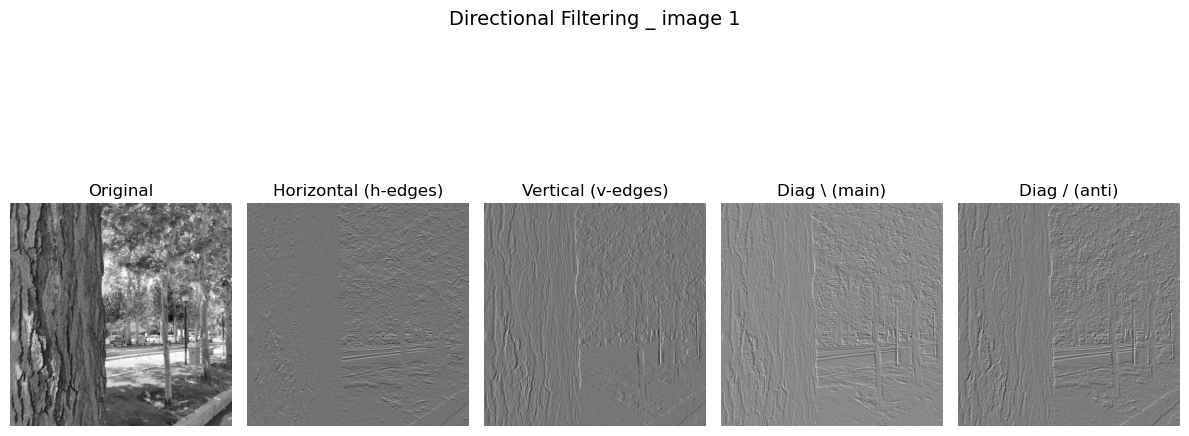

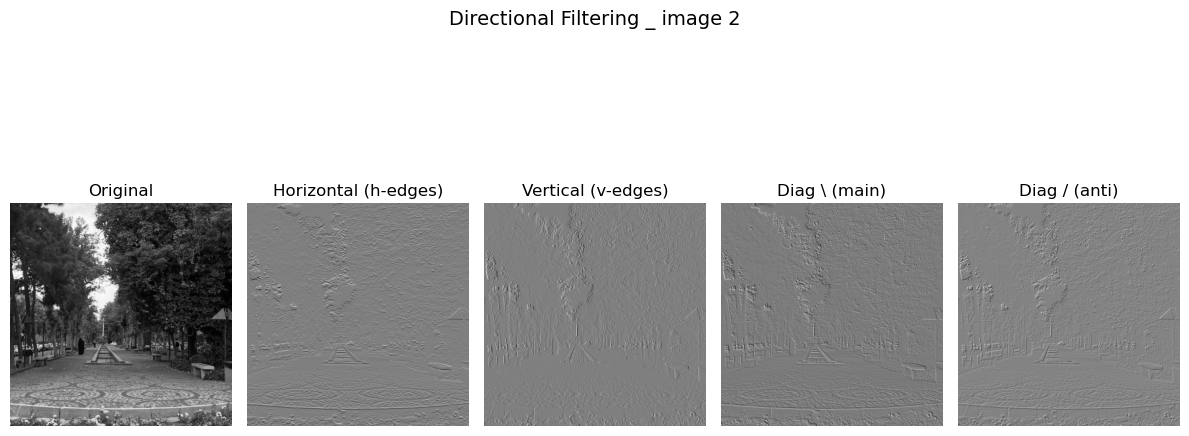

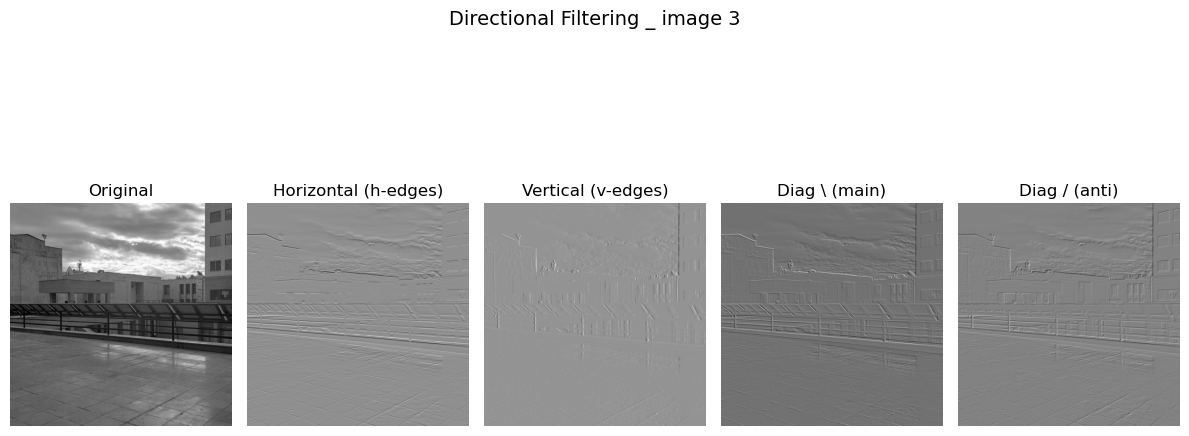

In [40]:
mean_intensity_dic = {
    '1': [],
    '2': [],
    '3': []
}

for idx, img_path in enumerate(paths):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Directional Filtering _ image {idx + 1}", fontsize=14)

    plt.subplot(1, len(kernels)+1, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    for i, (name, kernel) in enumerate(kernels.items(), start=2):
        filtered = cv2.filter2D(img, cv2.CV_64F, kernel)
        filtered = normalize(filtered)

        mean_intensity = np.mean(filtered)
        mean_intensity_dic[str(idx + 1)].append(mean_intensity)
        

        plt.subplot(1, len(kernels)+1, i)
        plt.imshow(filtered, cmap='gray')
        plt.title(name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [42]:
import pandas as pd

# Create a table from the dictionary
df = pd.DataFrame({
    "Image": ["Image 1", "Image 2", "Image 3"],
    "Horizontal": [mean_intensity_dic['1'][0], mean_intensity_dic['2'][0], mean_intensity_dic['3'][0]],
    "Vertical":   [mean_intensity_dic['1'][1], mean_intensity_dic['2'][1], mean_intensity_dic['3'][1]],
    "Main Diagonal": [mean_intensity_dic['1'][2], mean_intensity_dic['2'][2], mean_intensity_dic['3'][2]],
    "Anti Diagonal": [mean_intensity_dic['1'][3], mean_intensity_dic['2'][3], mean_intensity_dic['3'][3]],
})


In [45]:
df

,Image,Horizontal,Vertical,Main Diagonal,Anti Diagonal
0,Image 1,113.575231,117.689885,137.307733,123.474950
1,Image 2,127.100936,127.097824,123.187746,131.134095
2,Image 3,142.664805,147.706157,114.064689,129.756453
